**Introduction**

Hello, I'm going to preciton with Logistic regression. 
I will use  Heart Disease UCI dataset. If you wonder anything about dateset,you can read here. (https://www.kaggle.com/ronitf/heart-disease-uci) 

<img src="https://cdn-images-1.medium.com/max/1600/1*PkEl-8DBQa-xEft_tacXLQ.gif" width="500px">

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
#ReadData
data = pd.read_csv("../input/heart.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Seperate data
y =data.target.values
x1=data.drop(["target"],axis=1)

In [6]:
#Normalization 
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

In [7]:
#Split For Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [8]:
#transposition
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

In [9]:
#Initializing Parametres & Sigmoid Function
def initializing_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [10]:
#Forward & Backward Propogation

def forward_backwardpropogation(w,b,xtrain,y_train):
    #forward P.
    z = np.dot(w.T,xtrain) +  b 
    y_head = sigmoid(z)
    loss = -ytrain*np.log(y_head)-(1-ytrain)*np.log(1-y_head)
    cost = (np.sum(loss))/xtrain.shape[1]
    #backward p.
    derivative_weight = (np.dot(xtrain,((y_head-ytrain).T)))/xtrain.shape[1] 
    derivetive_bias = np.sum(y_head-ytrain)/xtrain.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivetive_bias": derivetive_bias}
    
    return cost,gradients

In [11]:
#Uptading parameters

def update(w,b,xtrain, ytrain, learning_rate, number_of_iteration):
    costlist = []
    costlist2 = []
    index = []
    #updating/learning parameters is number of iteration times
    for i in range(number_of_iteration):
        #makeforwardandbacwardprop.andfindcostandgradi
        cost,gradients = forward_backwardpropogation(w,b,xtrain,ytrain)
        costlist.append(cost)
        #updatingtime
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivetive_bias"]
        if i % 10 == 0:
            costlist2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
            
    #weupdate(learn) parameters weight & bias
    parameters = {"weight": w, "bias":b}
    plt.plot(index,costlist2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, costlist

In [12]:
#%% Prediciton Method
    
def predict(w,b,xtest):
    
    z =sigmoid(np.dot(w.T,xtest)+b)
    y_prediction = np.zeros((1,xtest.shape[1]))
    #if z > 0.5 predcition = 1 y_head=1
    #if z <= 0.5 prediciton = 0 y_head=0
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [13]:
# Logistic Reg.

def LogReg(xtrain,ytrain,xtest,ytest,learning_rate,number_of_iteration):
    #initializing
    dimension = xtrain.shape[0] 
    w,b=initializing_weights_and_bias(dimension)
    #forward & backward prop.
    parameters,gradients,costlist = update(w,b,xtrain,ytrain,learning_rate,number_of_iteration)
    
    y_prediciton_test = predict(parameters["weight"],parameters["bias"],xtest)

    #print train/test errors
    print("Test Accuracy:{} %".format(100-np.mean(np.abs(y_prediciton_test-ytest))*100))



Cost after iteration 0: 0.692516
Cost after iteration 10: 0.522652
Cost after iteration 20: 0.464812
Cost after iteration 30: 0.436631
Cost after iteration 40: 0.419664


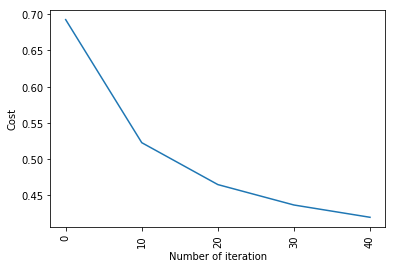

Test Accuracy:83.60655737704919 %


In [14]:
#Application1
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =50 )

Cost after iteration 0: 0.692516
Cost after iteration 10: 0.522652
Cost after iteration 20: 0.464812
Cost after iteration 30: 0.436631
Cost after iteration 40: 0.419664
Cost after iteration 50: 0.408136
Cost after iteration 60: 0.399711
Cost after iteration 70: 0.393253
Cost after iteration 80: 0.388134
Cost after iteration 90: 0.383976


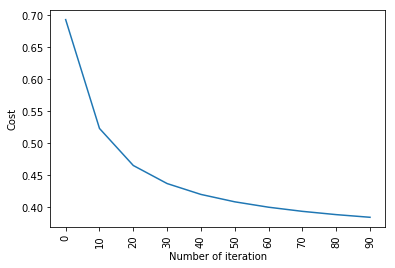

Test Accuracy:85.24590163934427 %


In [15]:
#Application2
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =100 )

Cost after iteration 0: 0.692516
Cost after iteration 10: 0.522652
Cost after iteration 20: 0.464812
Cost after iteration 30: 0.436631
Cost after iteration 40: 0.419664
Cost after iteration 50: 0.408136
Cost after iteration 60: 0.399711
Cost after iteration 70: 0.393253
Cost after iteration 80: 0.388134
Cost after iteration 90: 0.383976
Cost after iteration 100: 0.380530
Cost after iteration 110: 0.377629
Cost after iteration 120: 0.375155
Cost after iteration 130: 0.373021
Cost after iteration 140: 0.371161
Cost after iteration 150: 0.369526
Cost after iteration 160: 0.368078
Cost after iteration 170: 0.366787
Cost after iteration 180: 0.365628
Cost after iteration 190: 0.364583
Cost after iteration 200: 0.363634
Cost after iteration 210: 0.362770
Cost after iteration 220: 0.361980
Cost after iteration 230: 0.361254
Cost after iteration 240: 0.360585
Cost after iteration 250: 0.359967
Cost after iteration 260: 0.359393
Cost after iteration 270: 0.358860
Cost after iteration 280: 0.358

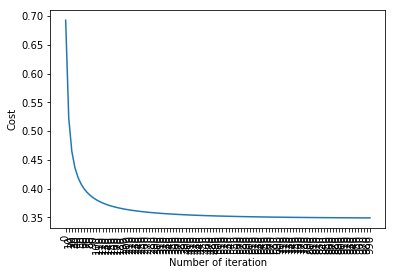

Test Accuracy:85.24590163934427 %


In [16]:
#Application3
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =1000)

Cost after iteration 0: 0.692516
Cost after iteration 10: 0.537444
Cost after iteration 20: 0.395875
Cost after iteration 30: 0.381412
Cost after iteration 40: 0.373671
Cost after iteration 50: 0.368587
Cost after iteration 60: 0.364995
Cost after iteration 70: 0.362323
Cost after iteration 80: 0.360257
Cost after iteration 90: 0.358612
Cost after iteration 100: 0.357272
Cost after iteration 110: 0.356161
Cost after iteration 120: 0.355227
Cost after iteration 130: 0.354432
Cost after iteration 140: 0.353750
Cost after iteration 150: 0.353159
Cost after iteration 160: 0.352645
Cost after iteration 170: 0.352195
Cost after iteration 180: 0.351800
Cost after iteration 190: 0.351450
Cost after iteration 200: 0.351141
Cost after iteration 210: 0.350866
Cost after iteration 220: 0.350620
Cost after iteration 230: 0.350401
Cost after iteration 240: 0.350205
Cost after iteration 250: 0.350029
Cost after iteration 260: 0.349871
Cost after iteration 270: 0.349729
Cost after iteration 280: 0.349

Cost after iteration 2340: 0.348242
Cost after iteration 2350: 0.348242
Cost after iteration 2360: 0.348242
Cost after iteration 2370: 0.348242
Cost after iteration 2380: 0.348242
Cost after iteration 2390: 0.348242
Cost after iteration 2400: 0.348242
Cost after iteration 2410: 0.348242
Cost after iteration 2420: 0.348242
Cost after iteration 2430: 0.348242
Cost after iteration 2440: 0.348242
Cost after iteration 2450: 0.348242
Cost after iteration 2460: 0.348242
Cost after iteration 2470: 0.348242
Cost after iteration 2480: 0.348242
Cost after iteration 2490: 0.348242
Cost after iteration 2500: 0.348242
Cost after iteration 2510: 0.348242
Cost after iteration 2520: 0.348242
Cost after iteration 2530: 0.348242
Cost after iteration 2540: 0.348242
Cost after iteration 2550: 0.348242
Cost after iteration 2560: 0.348242
Cost after iteration 2570: 0.348242
Cost after iteration 2580: 0.348242
Cost after iteration 2590: 0.348242
Cost after iteration 2600: 0.348242
Cost after iteration 2610: 0

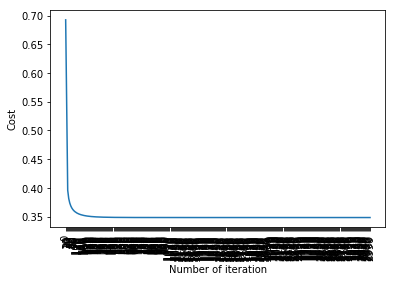

Test Accuracy:85.24590163934427 %


In [17]:
#Application4
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=3,number_of_iteration =3000)

In [18]:
#LR with sklearn
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
print("Test Accuracy {}".format(LR.score(xtest.T,ytest.T))) 

Test Accuracy 0.8524590163934426


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


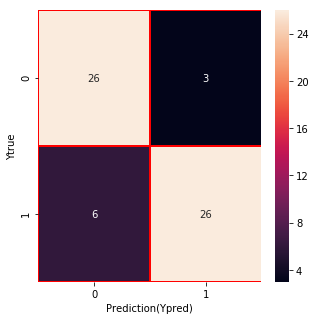

In [24]:
#Confusion Matrix

yprediciton= LR.predict(xtest.T)
ytrue = ytest.T

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

**Conclusion**

* Thank you for investigation my kernel 
* I benefit create of this kernel from DATAI Team (https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)
* If you like it, please upvote!
**THANK YOU**

<img src="https://media1.giphy.com/media/l0ExvuzJGJNZJZ47S/giphy.gif?cid=790b76115cc05331372f4d64593e8962" width="500px">